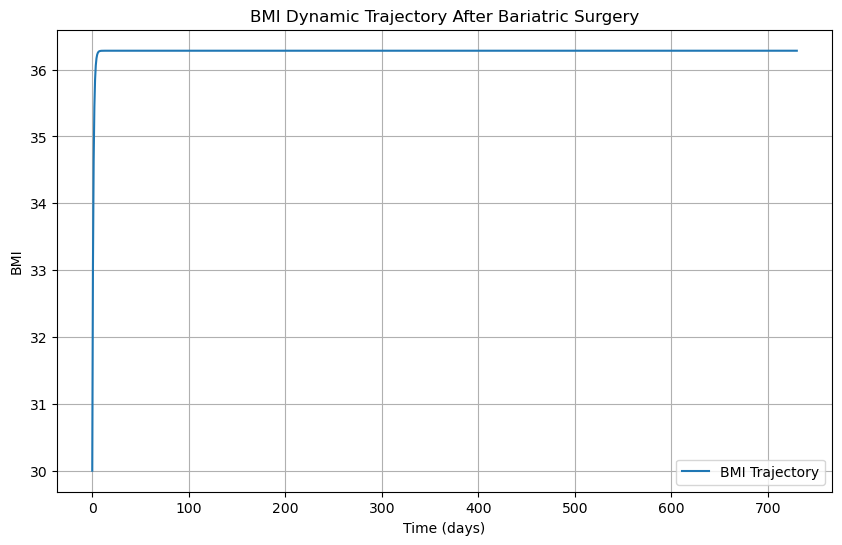

In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw
from scipy.integrate import odeint

# Define the function for BMI dynamics after bariatric surgery
def bmi_dynam_func(BMI, t, delta_EI, EI, delta, kappa, prt_fat, surg):
    # Model parameter list
    bw0 = 139  # initial body weight, from 60 to 160
    H_squared = 1.75 ** 2
    c = 10.4  # Forbes body composition parameter
    fm0 = 71.6  # initial fat mass =  multiply bodyweight by percent body fat
    rho = 32.2 * 239  # MJ/kg to kcal/kg
    eta_fm = 180  # kcal/kg?20 Fat synthesis efficiency
    eta_ffm = 230  # kcal/kg?100
    gamma_fm = 3.6  # kcal/kg/d Resting metabolic rate of fat
    gamma_ffm = 22  # kcal/kg/d
    beta = 0.24  # Adaptive thermogenesis parameter, 0.24+-0.1
    delta_bw = 13 * H_squared

    if surg == 0:
        pfm = prt_fat / 100
        g = c / (c + fm0)
    elif surg == 1:
        pfm = fm0 / bw0  # body fat percentage
        g = 1 + fm0 / delta_bw - c / delta_bw * lambertw(1 / c * np.exp(delta_bw / c) * fm0 * np.exp(fm0 / c)).real

    # Write out the dynamics function
    d_BMI = 365 * (kappa * EI - (gamma_ffm * (1 - pfm) + gamma_fm * pfm + delta) * BMI * H_squared + beta * delta_EI(t)) / ((rho + eta_fm * (1 - g) + eta_ffm * g) * H_squared)
    
    return d_BMI

# Define the delta_EI function
def delta_EI(t):
    # Define how delta_EI changes over time, example placeholder function
    return 0

# Function to simulate and plot BMI dynamics
def plot_bmi_trajectory(bmi_0, delta_EI, EI, delta, kappa, prt_fat, surg, t_end, num_points=1000):
    # Time vector
    t = np.linspace(0, t_end, num_points)
    
    # Solve the differential equation
    BMI_trajectory = odeint(bmi_dynam_func, bmi_0, t, args=(delta_EI, EI, delta, kappa, prt_fat, surg))
    
    # Plot the trajectory
    plt.figure(figsize=(10, 6))
    plt.plot(t, BMI_trajectory, label='BMI Trajectory')
    plt.xlabel('Time (days)')
    plt.ylabel('BMI')
    plt.title('BMI Dynamic Trajectory After Bariatric Surgery')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
bmi_0 = 30  # Initial BMI
EI = 2200  # Energy intake (kcal/day)
delta = 7  # Physical activity coefficient (kcal/kg/d)
kappa = 1  # Energy absorption discount factor
prt_fat = 50  # Percentage of body fat
surg = 0  # 0 for no surgery, 1 for post-surgery
t_end = 365 * 2  # End time for the simulation (in days, 2 years)

plot_bmi_trajectory(bmi_0, delta_EI, EI, delta, kappa, prt_fat, surg, t_end)


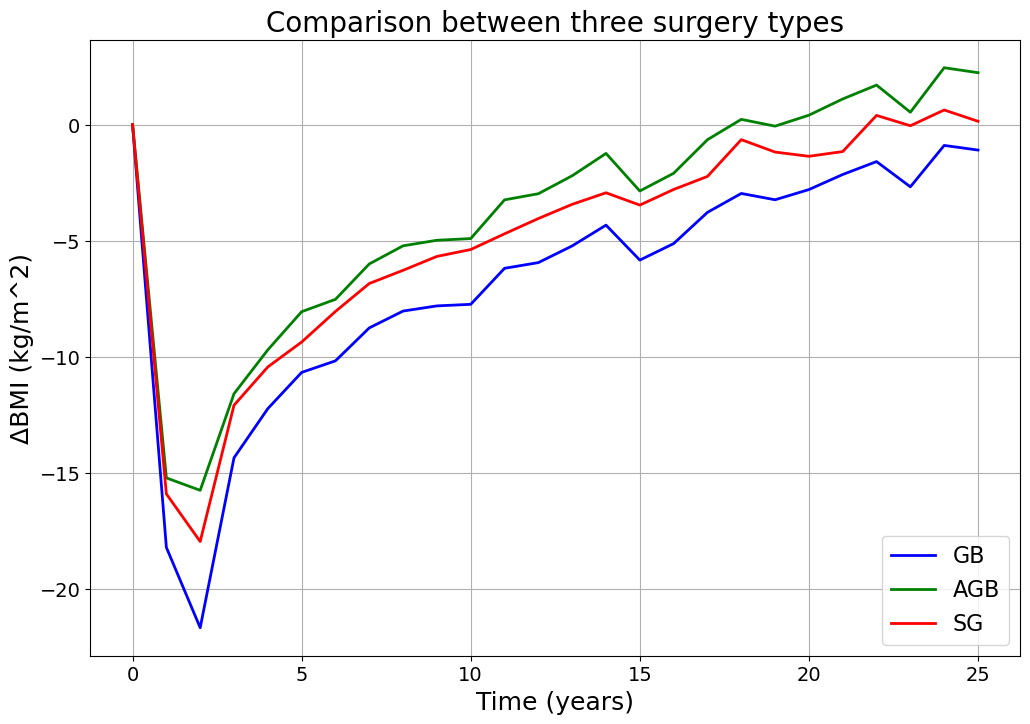

In [20]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw
from scipy.stats import truncnorm

# Define the function for BMI dynamics after bariatric surgery
def bmi_dynam(t, BMI, delta_EI, EI, delta, kappa, prt_fat, surg):
    # Model parameter list
    bw0 = 139  # initial body weight, from 60 to 160
    H_squared = 1.75 ** 2
    c = 10.4  # Forbes body composition parameter
    fm0 = 71.6  # initial fat mass
    rho = 32.2 * 239  # MJ/kg to kcal/kg
    eta_fm = 180  # kcal/kg?20 Fat synthesis efficiency
    eta_ffm = 230  # kcal/kg?100
    gamma_fm = 3.6  # kcal/kg/d Resting metabolic rate of fat
    gamma_ffm = 22  # kcal/kg/d
    beta = 0.24  # Adaptive thermogenesis parameter, 0.24+-0.1
    delta_bw = 13 * H_squared

    if surg == 0:
        pfm = prt_fat / 100
        g = c / (c + fm0)
    elif surg == 1:
        pfm = fm0 / bw0  # body fat percentage
        g = 1 + fm0 / delta_bw - c / delta_bw * lambertw(1 / c * np.exp(delta_bw / c) * fm0 * np.exp(fm0 / c)).real

    # Write out the dynamics function
    d_BMI = 365 * (kappa * EI - (gamma_ffm * (1 - pfm) + gamma_fm * pfm + delta) * BMI * H_squared + beta * delta_EI(t)) / ((rho + eta_fm * (1 - g) + eta_ffm * g) * H_squared)
    
    return d_BMI

# Define the delta_EI function
def delta_EI(t):
    # Define how delta_EI changes over time, example placeholder function
    return 0

# Simulation parameters
loop_num = 10
year_last = 25
tSPAN = np.arange(1, year_last + 1)
bw0 = 139  # initial body weight, from 60 to 160
H_squared = 1.75 ** 2  # default height: 1.75m
bmi0 = bw0 / H_squared

# Define key parameters
EI_mean_GB = 1240  # kcal/day
EI_sd_GB = 406
delta_mean_GB = 63 * 4 / 60  # kcal/day
delta_sd_GB = 38 * 4 / 60
EI_mean_AGB = 1554  # kcal/day
EI_sd_AGB = 440
delta_mean_AGB = 61 * 4 / 60  # kcal/day
delta_sd_AGB = 38 * 4 / 60
EI_mean_SG = 1418  # kcal/day
EI_sd_SG = 42
delta_mean_SG = 60 * 4 / 60  # kcal/day
delta_sd_SG = 30 * 4 / 60

bmi_GB = np.zeros((loop_num, year_last + 1))
bmi_GB[:, 0] = bmi0
bmi_AGB = np.zeros((loop_num, year_last + 1))
bmi_AGB[:, 0] = bmi0
bmi_SG = np.zeros((loop_num, year_last + 1))
bmi_SG[:, 0] = bmi0
kappa_GB = 0.93
kappa_AGB = 1
kappa_SG = 1

# Simulation for post surgery BMI dynamics
for loop_id in range(loop_num):
    for t in tSPAN:
        if t > 2:
            # Dynamics after year two
            EI = np.random.normal(1801 + 200 * np.sqrt(t - 2), 60)
            delta = np.random.normal(94, 8) * 4 / 60
            bmi_GB[loop_id, t] = bmi_GB[loop_id, t-1] + bmi_dynam(t-1, bmi_GB[loop_id, t-1], delta_EI, EI, delta, kappa_GB, 50, 1)
            bmi_AGB[loop_id, t] = bmi_AGB[loop_id, t-1] + bmi_dynam(t-1, bmi_AGB[loop_id, t-1], delta_EI, EI, delta, kappa_AGB, 50, 1)
            EI_SG = np.random.normal(1800 + 180 * np.sqrt(t - 2), 60)
            bmi_SG[loop_id, t] = bmi_SG[loop_id, t-1] + bmi_dynam(t-1, bmi_SG[loop_id, t-1], delta_EI, EI_SG, delta, kappa_SG, 50, 1)
        else:
            # Dynamics for the first two years after surgery
            # GB
            EI_GB = np.random.normal(EI_mean_GB, EI_sd_GB)
            delta_GB = np.random.normal(delta_mean_GB, delta_sd_GB)
            while delta_GB < 0:  # force positive delta
                delta_GB = np.random.normal(delta_mean_GB, delta_sd_GB)
            bmi_GB[loop_id, t] = bmi_GB[loop_id, t-1] + bmi_dynam(t-1, bmi_GB[loop_id, t-1], delta_EI, EI_GB, delta_GB, kappa_GB, 50, 1)
            # AGB
            EI_AGB = np.random.normal(EI_mean_AGB, EI_sd_AGB)
            delta_AGB = np.random.normal(delta_mean_AGB, delta_sd_AGB)
            while delta_AGB < 0:  # force positive delta
                delta_AGB = np.random.normal(delta_mean_AGB, delta_sd_AGB)
            bmi_AGB[loop_id, t] = bmi_AGB[loop_id, t-1] + bmi_dynam(t-1, bmi_AGB[loop_id, t-1], delta_EI, EI_AGB, delta_AGB, kappa_AGB, 50, 1)
            # SG
            EI_SG = np.random.normal(EI_mean_SG, EI_sd_SG)
            delta_SG = np.random.normal(delta_mean_SG, delta_sd_SG)
            while delta_SG < 0:  # force positive delta
                delta_SG = np.random.normal(delta_mean_SG, delta_sd_SG)
            bmi_SG[loop_id, t] = bmi_SG[loop_id, t-1] + bmi_dynam(t-1, bmi_SG[loop_id, t-1], delta_EI, EI_SG, delta_SG, kappa_SG, 50, 1)

# Shift the initial BMI reference to 0
bmi_GB -= bmi0
bmi_AGB -= bmi0
bmi_SG -= bmi0

# Plot change of BMI for single set of Delta and EI
bmi_GB_mean = np.mean(bmi_GB, axis=0)
bmi_AGB_mean = np.mean(bmi_AGB, axis=0)
bmi_SG_mean = np.mean(bmi_SG, axis=0)
x_ax = np.arange(0, year_last + 1)

# Create figure
plt.figure(figsize=(12, 8))
plt.plot(x_ax, bmi_GB_mean, 'b', label='GB', linewidth=2)
plt.plot(x_ax, bmi_AGB_mean, 'g', label='AGB', linewidth=2)
plt.plot(x_ax, bmi_SG_mean, 'r', label='SG', linewidth=2)
plt.legend(fontsize=16)
plt.title('Comparison between three surgery types', fontsize=20)
plt.xlabel('Time (years)', fontsize=18)
plt.ylabel('ΔBMI (kg/m^2)', fontsize=18)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


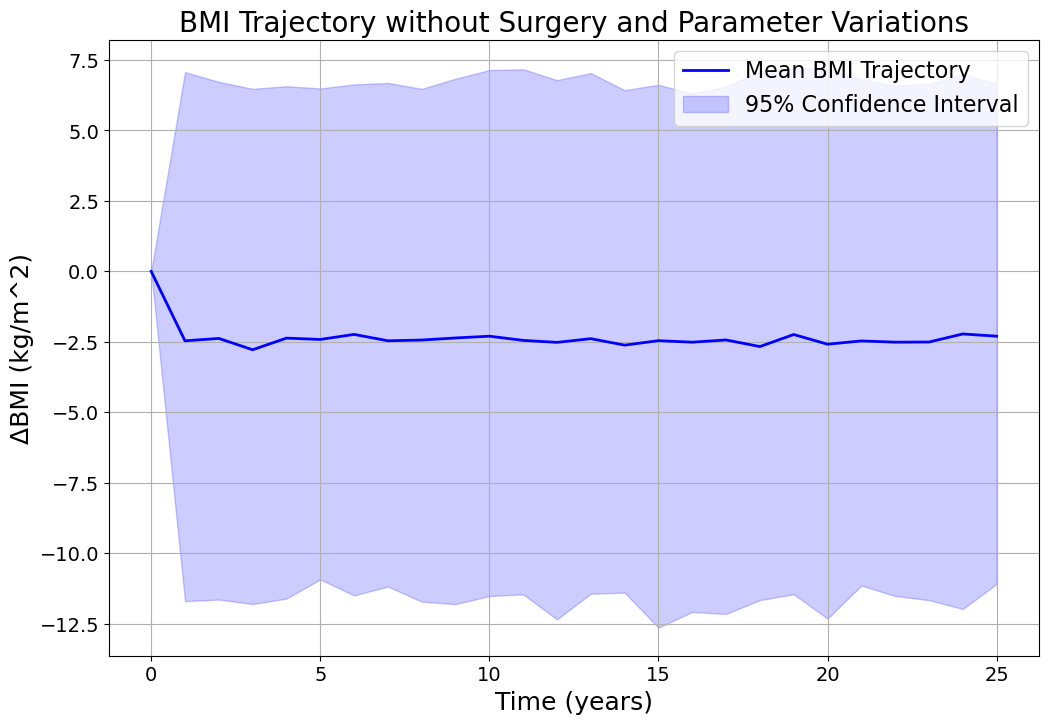

In [67]:
# Without surgery

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw

# Define the function for BMI dynamics without surgery
def bmi_dynam(t, BMI, delta_EI, EI, delta, kappa, prt_fat):
    # Model parameter list
    bw0 = 100  # initial body weight, from 60 to 160
    H_squared = 1.75 ** 2
    c = 10.4  # Forbes body composition parameter
    fm0 = 30.6  # initial fat mass
    rho = 32.2 * 239  # MJ/kg to kcal/kg
    eta_fm = 180  # kcal/kg?20 Fat synthesis efficiency
    eta_ffm = 230  # kcal/kg?100
    gamma_fm = 3.6  # kcal/kg/d Resting metabolic rate of fat
    gamma_ffm = 22  # kcal/kg/d
    beta = 0.24  # Adaptive thermogenesis parameter, 0.24+-0.1
    pfm = prt_fat / 100  # body fat percentage
    g = c / (c + fm0)

    # Write out the dynamics function
    d_BMI = 365 * (kappa * EI - (gamma_ffm * (1 - pfm) + gamma_fm * pfm + delta) * BMI * H_squared 
                   + beta * delta_EI(t)) / ((rho + eta_fm * (1 - g) + eta_ffm * g) * H_squared)
    
    return d_BMI

# Define the delta_EI function
def delta_EI(t):
    return 0  # example variation, replace with actual model if needed

# Simulation parameters
loop_num = 1000  # Number of simulation runs for variations
year_last = 25
tSPAN = np.arange(1, year_last + 1)
bw0 = 101  # initial body weight, from 60 to 160
H_squared = 1.75 ** 2  # default height: 1.75m
bmi0 = bw0 / H_squared

# Initialize BMI array to store trajectories
bmi_trajectories = np.zeros((loop_num, year_last + 1))
bmi_trajectories[:, 0] = bmi0

# Key parameters with variations
EI_mean = 2200  # Mean energy intake (kcal/day)
EI_sd = 300  # Standard deviation for energy intake
delta_mean = 7  # Mean physical activity coefficient (kcal/kg/d): a function that reflects the calories expended through physical
                # activity, measured by the number of minutes per day of moderate-intensity or higher physical activity devided by
                # a conversion ratio of 266
delta_sd = 0.2  # Standard deviation for physical activity
prt_fat_mean = 30  # Mean percentage of body fat
prt_fat_sd = 5  # Standard deviation for percentage of body fat
kappa = 1  # Energy absorption discount factor, assume 1 for no surgery

# Simulation without surgery and including parameter variations
for loop_id in range(loop_num):
    for t in tSPAN:
        EI = np.random.normal(EI_mean, EI_sd)
        delta = np.random.normal(delta_mean, delta_sd)
        prt_fat = np.random.normal(prt_fat_mean, prt_fat_sd)
        bmi_trajectories[loop_id, t] = bmi_trajectories[loop_id, t-1] + bmi_dynam(t-1, bmi_trajectories[loop_id, t-1], delta_EI, EI, delta, kappa, prt_fat)

# Shift the initial BMI reference to 0
bmi_trajectories -= bmi0

# Calculate the mean and 95% confidence intervals
bmi_mean = np.mean(bmi_trajectories, axis=0)
bmi_lower = np.percentile(bmi_trajectories, 2.5, axis=0)
bmi_upper = np.percentile(bmi_trajectories, 97.5, axis=0)
x_ax = np.arange(0, year_last + 1)

# Plot the BMI trajectory with 95% confidence interval
plt.figure(figsize=(12, 8))
plt.plot(x_ax, bmi_mean, 'b', label='Mean BMI Trajectory', linewidth=2)
plt.fill_between(x_ax, bmi_lower, bmi_upper, color='b', alpha=0.2, label='95% Confidence Interval')
plt.legend(fontsize=16)
plt.title('BMI Trajectory without Surgery and Parameter Variations', fontsize=20)
plt.xlabel('Time (years)', fontsize=18)
plt.ylabel('ΔBMI (kg/m^2)', fontsize=18)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


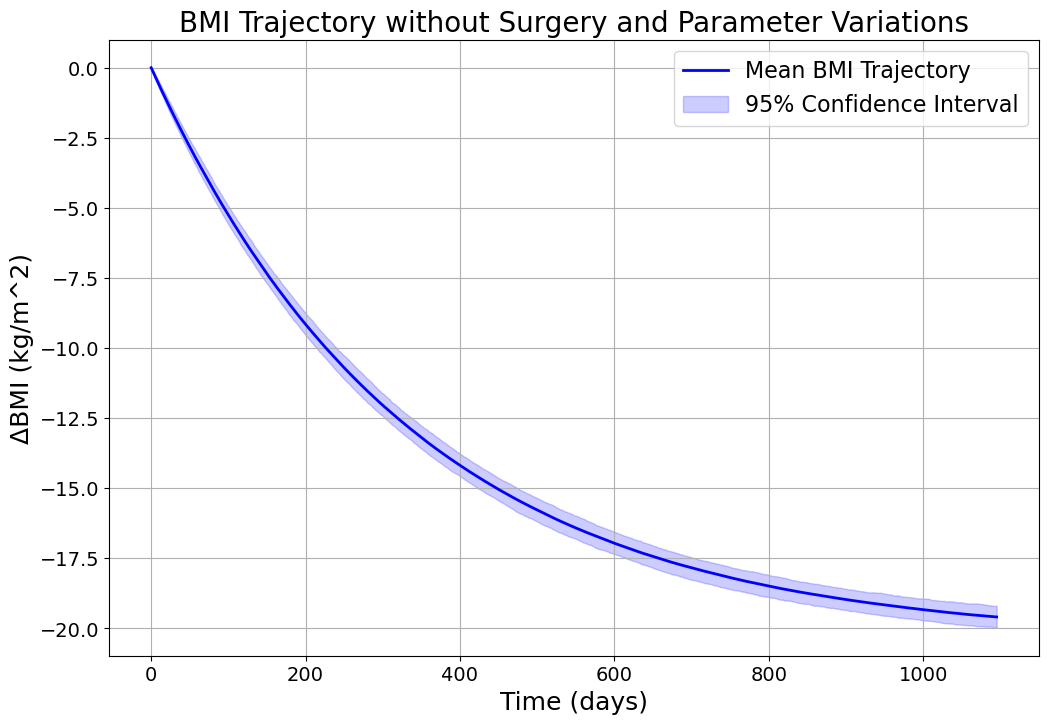

In [33]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import lambertw

# Define the function for BMI dynamics without surgery
def bmi_dynam(BMI, t, delta_EI, EI, delta, kappa, prt_fat):
    # Model parameter list
    bw0 = 139  # initial body weight, from 60 to 160
    H_squared = 1.75 ** 2
    c = 10.4  # Forbes body composition parameter
    fm0 = 71.6  # initial fat mass
    rho = 32.2 * 239  # MJ/kg to kcal/kg
    eta_fm = 180  # kcal/kg?20 Fat synthesis efficiency
    eta_ffm = 230  # kcal/kg?100
    gamma_fm = 3.6  # kcal/kg/d Resting metabolic rate of fat
    gamma_ffm = 22  # kcal/kg/d
    beta = 0.24  # Adaptive thermogenesis parameter, 0.24+-0.1
    pfm = prt_fat / 100  # body fat percentage
    g = c / (c + fm0)

    # Write out the dynamics function
    d_BMI = (kappa * EI - (gamma_ffm * (1 - pfm) + gamma_fm * pfm + delta) * BMI * H_squared + beta * delta_EI(t)) / ((rho + eta_fm * (1 - g) + eta_ffm * g) * H_squared)
    
    return d_BMI

# Define the delta_EI function
def delta_EI(t):
    # Define how delta_EI changes over time, example placeholder function
    return 0  # example variation, replace with actual model if needed

# Simulation parameters
loop_num = 1000  # Number of simulation runs for variations
day_last = 3 * 365  # Convert 25 years to days
tSPAN = np.arange(1, day_last + 1)
bw0 = 139  # initial body weight, from 60 to 160
H_squared = 1.75 ** 2  # default height: 1.75m
bmi0 = bw0 / H_squared

# Initialize BMI array to store trajectories
bmi_trajectories = np.zeros((loop_num, day_last + 1))
bmi_trajectories[:, 0] = bmi0

# Key parameters with variations
EI_mean = 1800  # Mean energy intake (kcal/day)
EI_sd = 300  # Standard deviation for energy intake
delta_mean = 7  # Mean physical activity coefficient (kcal/kg/d)
delta_sd = 2  # Standard deviation for physical activity
prt_fat_mean = 30  # Mean percentage of body fat
prt_fat_sd = 10  # Standard deviation for percentage of body fat
kappa = 1  # Energy absorption discount factor, assume 1 for no surgery

# Simulation without surgery and including parameter variations
for loop_id in range(loop_num):
    for t in tSPAN:
        EI = np.random.normal(EI_mean, EI_sd)
        delta = np.random.normal(delta_mean, delta_sd)
        prt_fat = np.random.normal(prt_fat_mean, prt_fat_sd)
        dBMI = bmi_dynam(bmi_trajectories[loop_id, t-1], t-1, delta_EI, EI, delta, kappa, prt_fat)
        bmi_trajectories[loop_id, t] = bmi_trajectories[loop_id, t-1] + dBMI

# Shift the initial BMI reference to 0
bmi_trajectories -= bmi0

# Calculate the mean and 95% confidence intervals
bmi_mean = np.mean(bmi_trajectories, axis=0)
bmi_lower = np.percentile(bmi_trajectories, 2.5, axis=0)
bmi_upper = np.percentile(bmi_trajectories, 97.5, axis=0)
x_ax = np.arange(0, day_last + 1)

# Plot the BMI trajectory with 95% confidence interval
plt.figure(figsize=(12, 8))
plt.plot(x_ax, bmi_mean, 'b', label='Mean BMI Trajectory', linewidth=2)
plt.fill_between(x_ax, bmi_lower, bmi_upper, color='b', alpha=0.2, label='95% Confidence Interval')
plt.legend(fontsize=16)
plt.title('BMI Trajectory without Surgery and Parameter Variations', fontsize=20)
plt.xlabel('Time (days)', fontsize=18)
plt.ylabel('ΔBMI (kg/m^2)', fontsize=18)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
